### Income
LinkedIn: Python Statistics (Michele Vallisneri)

In [29]:
import numpy as np
import scipy.stats
import pandas as pd

In [30]:
import matplotlib
import matplotlib.pyplot as pp
from IPython import display
from ipywidgets import interact, widgets
%matplotlib inline

In [31]:
# sudo -H pip3 install ipywidgets  
# sudo -H pip3 install --upgrade ipywidgets  
# sudo jupyter nbextension enable --py widgetsnbextension
# sudo jupyter nbextension enable --py --sys-prefix widgetsnbextension
# restarted the computer.

In [32]:
import re
import mailbox
import csv

In [33]:
gapminder = pd.read_csv('gapminder.csv')

In [34]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           14740 non-null  object 
 1   year              14740 non-null  int64  
 2   region            14740 non-null  object 
 3   population        14740 non-null  float64
 4   life_expectancy   14740 non-null  float64
 5   age5_surviving    14740 non-null  float64
 6   babies_per_woman  14740 non-null  float64
 7   gdp_per_capita    14740 non-null  float64
 8   gdp_per_day       14740 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


In [35]:
gapminder.loc[0:200:20]

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.00,603.0,1.650924
20,Afghanistan,1955,Asia,8270024.0,29.27,60.193,7.67,1125.0,3.080082
40,Afghanistan,1975,Asia,12582954.0,39.61,72.060,7.67,1201.0,3.288159
60,Afghanistan,1995,Asia,16772522.0,49.40,84.770,7.83,872.0,2.387406
80,Afghanistan,2015,Asia,32526562.0,53.80,90.890,4.47,1925.0,5.270363
100,Albania,1954,Europe,1382881.0,56.59,84.829,6.31,2108.0,5.771389
120,Albania,1974,Europe,2358467.0,69.35,90.082,4.54,4177.0,11.436003
140,Albania,1994,Europe,3140634.0,73.60,96.540,2.77,3457.0,9.464750
160,Albania,2014,Europe,2889676.0,77.90,98.560,1.78,10160.0,27.816564
180,Algeria,1953,Africa,9405445.0,43.96,73.758,7.65,4077.0,11.162218


<AxesSubplot:xlabel='babies_per_woman', ylabel='age5_surviving'>

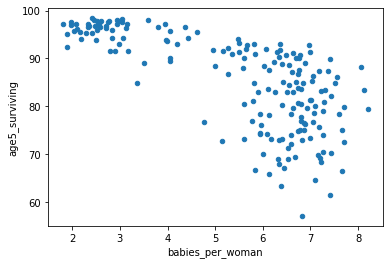

In [36]:
gapminder[gapminder.year == 1965].plot.scatter('babies_per_woman','age5_surviving')

In [37]:
def plotyear(year):
    data = gapminder[gapminder.year == year]
    area = 5e-6 * data.population
    colors = data.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})
    
    data.plot.scatter('babies_per_woman','age5_surviving',
                      s=area,c=colors,
                      linewidths=1,edgecolors='k',
                      figsize=(12,9))
    
    pp.axis(ymin=50,ymax=105,xmin=0,xmax=8)
    pp.xlabel('babies per woman')
    pp.ylabel('% children alive at 5')

<function __main__.plotyear(year)>

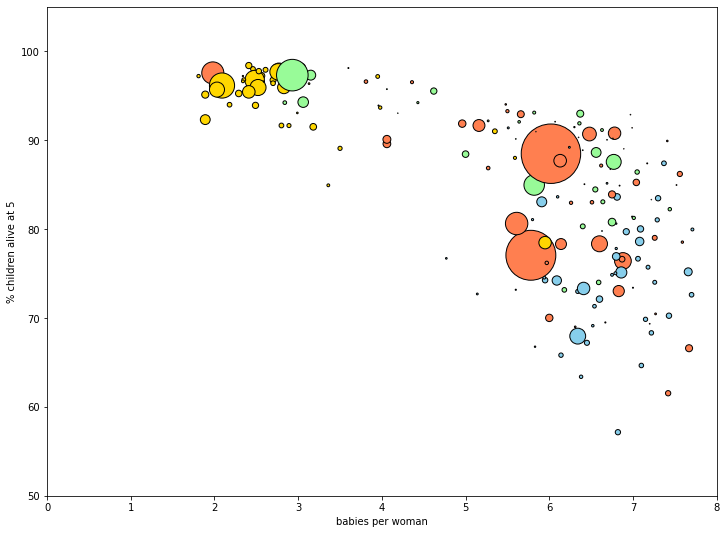

In [39]:
interact(plotyear,year=widgets.IntSlider(min=1950,max=2015,step=1,value=1965))

In [40]:
china1965 = pd.read_csv('income-1965-china.csv')
china2015 = pd.read_csv('income-2015-china.csv')
usa1965 = pd.read_csv('income-1965-usa.csv')
usa2015 = pd.read_csv('income-2015-usa.csv')

In [41]:
china1965.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   income        1000 non-null   float64
 1   log10_income  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [42]:
china1965.head()

,income,log10_income
0,1.026259,0.011257
1,0.912053,-0.039980
2,0.110699,-0.955857
3,0.469659,-0.328217
4,0.374626,-0.426402


In [43]:
china1965.min()

income          0.041968
log10_income   -1.377078
dtype: float64

In [44]:
china1965.max()

income          5.426802
log10_income    0.734544
dtype: float64

In [45]:
china1965.mean()

income          0.660597
log10_income   -0.274157
dtype: float64

In [46]:
china1965.var(ddof=0)

income          0.208846
log10_income    0.088610
dtype: float64

In [47]:
china1965.quantile([0.25,0.75])

,income,log10_income
0.25,0.344130,-0.463277
0.75,0.863695,-0.063640


In [48]:
china1965.quantile(0.5)

income          0.557477
log10_income   -0.253773
Name: 0.5, dtype: float64

In [49]:
china1965.median()

income          0.557477
log10_income   -0.253773
dtype: float64

In [50]:
scipy.stats.percentileofscore(china1965.income,1.5)

95.5

In [51]:
china1965.describe()

,income,log10_income
count,1000.000000,1000.000000
mean,0.660597,-0.274157
std,0.457226,0.297822
min,0.041968,-1.377078
25%,0.344130,-0.463277
50%,0.557477,-0.253773
75%,0.863695,-0.063640
max,5.426802,0.734544


In [52]:
usa1965.describe()

,income,log10_income
count,1000.000000,1000.000000
mean,31.587965,1.418835
std,22.101531,0.262200
min,4.177852,0.620953
25%,17.498592,1.243003
50%,26.069531,1.416133
75%,39.017113,1.591255
max,246.030397,2.390989


<AxesSubplot:>

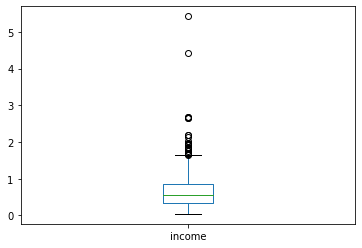

In [53]:
china1965.income.plot(kind='box')

<AxesSubplot:>

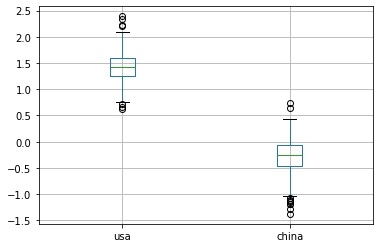

In [54]:
pd.DataFrame({'usa': usa1965.log10_income, 'china': china1965.log10_income}).boxplot()

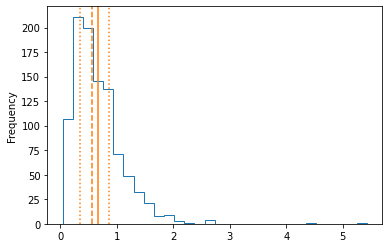

In [55]:
china1965.income.plot(kind='hist',histtype='step',bins=30)
pp.axvline(china1965.income.mean(),c='C1')
pp.axvline(china1965.income.median(),c='C1',linestyle='--')
pp.axvline(china1965.income.quantile(0.25),c='C1',linestyle=':')
pp.axvline(china1965.income.quantile(0.75),c='C1',linestyle=':')

(0.0, 3.0, 0.0, 1.2342999882944066)

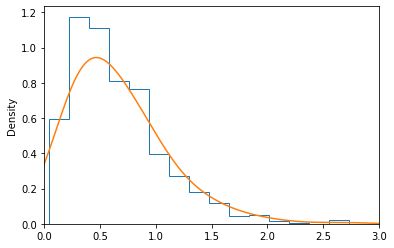

In [56]:
china1965.income.plot(kind='hist',histtype='step',bins=30,density=True)
china1965.income.plot.density(bw_method=0.5)
pp.axis(xmin=0,xmax=3)

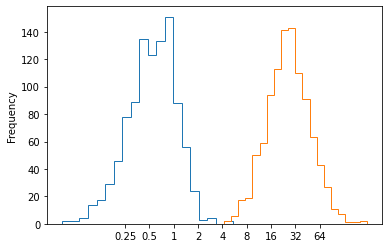

In [59]:
china1965.log10_income.plot.hist(histtype='step',bins=20)
usa1965.log10_income.plot.hist(histtype='step',bins=20)
levels = [0.25,0.5,1,2,4,8,16,32,64]
pp.xticks(np.log10(levels),levels);

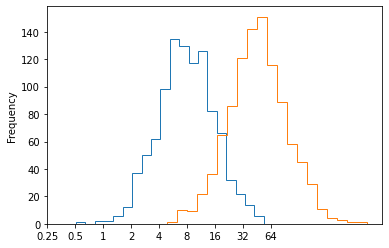

In [60]:
china2015.log10_income.plot.hist(histtype='step',bins=20)
usa2015.log10_income.plot.hist(histtype='step',bins=20)
levels = [0.25,0.5,1,2,4,8,16,32,64]
pp.xticks(np.log10(levels),levels);

In [61]:
gapminder = pd.read_csv('gapminder.csv')

In [62]:
china_pop2015 = float(gapminder.query('country == "China" and year == 2015').population)

In [63]:
usa_pop2015 = float(gapminder.query('country == "United States" and year == 2015').population)

In [64]:
china_pop2015, usa_pop2015

(1376048943.0, 321773631.0)

In [65]:
china2015['weight'] = china_pop2015 / len(china2015)
usa2015['weight'] = usa_pop2015 / len(usa2015)

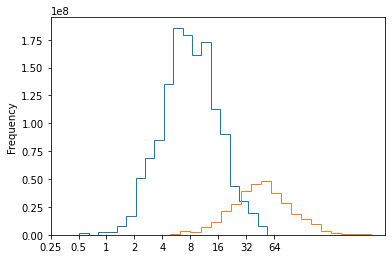

In [69]:
china2015.log10_income.plot.hist(histtype='step',bins=20,weights=china2015.weight)
usa2015.log10_income.plot.hist(histtype='step',bins=20,weights=usa2015.weight)
levels = [0.25,0.5,1,2,4,8,16,32,64]
pp.xticks(np.log10(levels),levels);

In [70]:
gapminder = pd.read_csv('gapminder.csv')

In [71]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           14740 non-null  object 
 1   year              14740 non-null  int64  
 2   region            14740 non-null  object 
 3   population        14740 non-null  float64
 4   life_expectancy   14740 non-null  float64
 5   age5_surviving    14740 non-null  float64
 6   babies_per_woman  14740 non-null  float64
 7   gdp_per_capita    14740 non-null  float64
 8   gdp_per_day       14740 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


In [72]:
italy = gapminder.query('country == "Italy"')

In [73]:
italy.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
6397,Italy,1800,Europe,18822234.0,29.69,54.259,5.47,2225.0,6.091718
6398,Italy,1810,Europe,19491674.0,29.69,54.395,5.47,2371.0,6.491444
6399,Italy,1820,Europe,20341608.0,29.69,54.531,5.47,2474.0,6.773443
6400,Italy,1830,Europe,21529667.0,29.69,54.667,5.47,2471.0,6.765229
6401,Italy,1840,Europe,22956667.0,29.69,54.804,5.47,2524.0,6.910335


<AxesSubplot:xlabel='year', ylabel='population'>

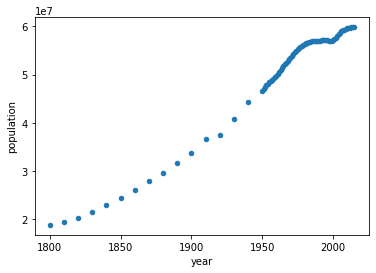

In [74]:
italy.plot.scatter("year", "population")

<AxesSubplot:xlabel='year', ylabel='population'>

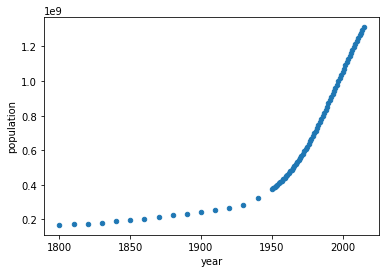

In [75]:
gapminder.query('country == "India"').plot.scatter("year","population")

<AxesSubplot:xlabel='year', ylabel='gdp_per_day'>

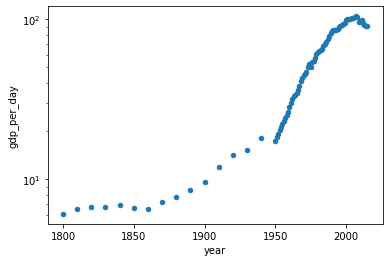

In [76]:
italy.plot.scatter("year", "gdp_per_day", logy=True)

<AxesSubplot:xlabel='gdp_per_day', ylabel='life_expectancy'>

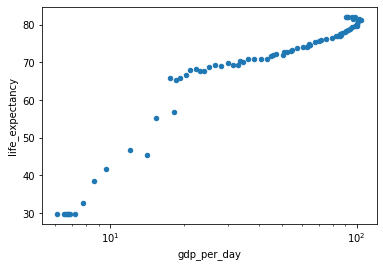

In [77]:
italy.plot.scatter("gdp_per_day", "life_expectancy", logx=True)

<AxesSubplot:xlabel='gdp_per_day', ylabel='life_expectancy'>

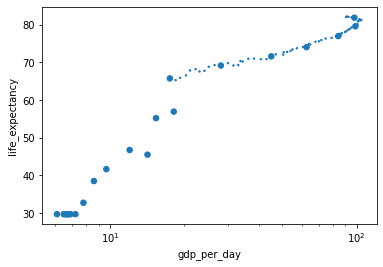

In [78]:
size = np.where(italy.year % 10 == 0,30,2)
italy.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size)

<AxesSubplot:xlabel='gdp_per_day', ylabel='life_expectancy'>

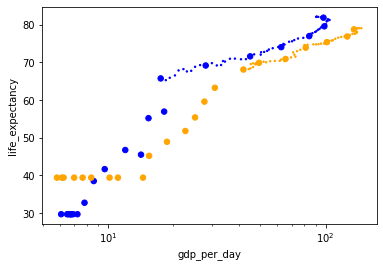

In [81]:
data = gapminder.query('(country == "Italy") or (country == "United States")')
size = np.where(data.year % 10 == 0,30,2)
color = np.where(data.country == 'Italy','blue','orange')
data.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size, c=color)

<AxesSubplot:xlabel='gdp_per_day', ylabel='life_expectancy'>

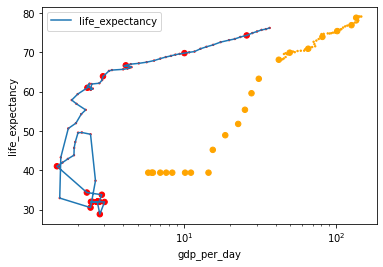

In [82]:
data = gapminder.query('(country == "China") or (country == "United States")')
size = np.where(data.year % 10 == 0,30,2)
color = np.where(data.country == 'China','red','orange')
ax = data.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size, c=color)
data[data.country == 'China'].plot.line(x='gdp_per_day',y='life_expectancy',ax=ax)

In [95]:
gapminder = pd.read_csv('gapminder.csv')

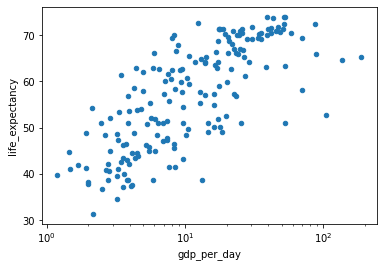

In [96]:
def plotyear(year):
    data = gapminder[gapminder.year == year]
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True)

plotyear(1965)

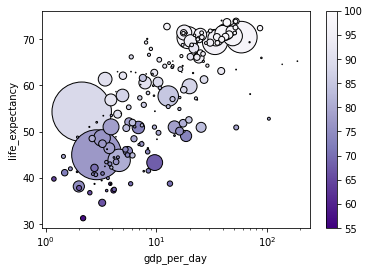

In [97]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,
                      s=area, c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
                      linewidths=1, edgecolors='k', sharex=False)

plotyear(1965)

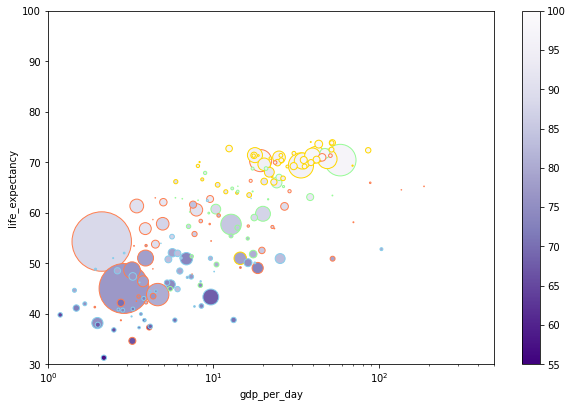

In [86]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue','Europe': 'gold','America': 'palegreen','Asia': 'coral'})
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,
                      s=area, c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
                      linewidths=1, edgecolors=edgecolor, sharex=False,
                      figsize=(10,6.5))

    pp.axis(xmin=1,xmax=500,ymin=30,ymax=100)
    
plotyear(1965)

<function __main__.plotyear(year)>

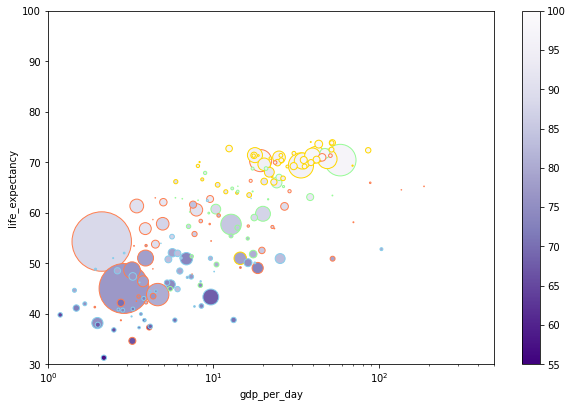

In [88]:
interact(plotyear,year=range(1965,2016,10))

In [98]:
gapminder[gapminder.year == 2015].population.sum()

7292414176.0

In [99]:
gapminder[gapminder.year == 2015].groupby('region').population.sum()

region
Africa     1.172161e+09
America    9.865771e+08
Asia       4.299142e+09
Europe     8.345345e+08
Name: population, dtype: float64

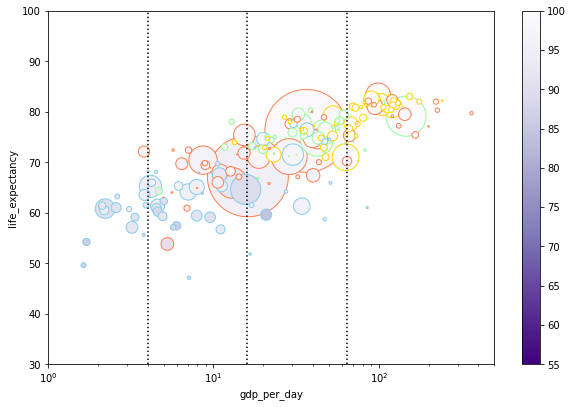

In [100]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue','Europe': 'gold','America': 'palegreen','Asia': 'coral'})
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,
                      s=area, c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
                      linewidths=1, edgecolors=edgecolor, sharex=False,
                      figsize=(10,6.5))

    for level in [4,16,64]:
        pp.axvline(level,linestyle=':',color='k')
    
    pp.axis(xmin=1,xmax=500,ymin=30,ymax=100)
    
plotyear(2015)

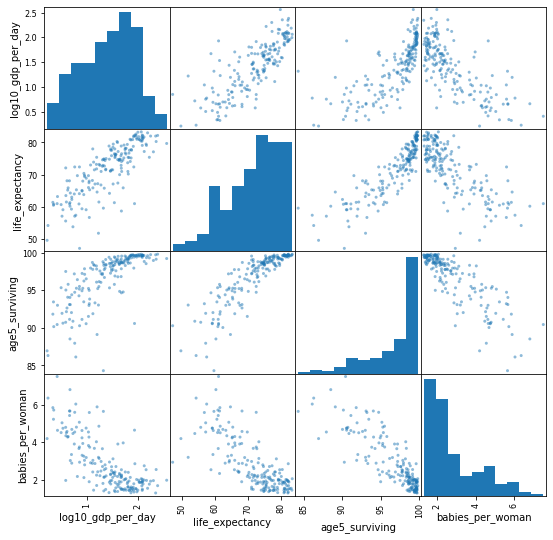

In [104]:
gapminder['log10_gdp_per_day'] = np.log10(gapminder['gdp_per_day'])
data = gapminder.loc[gapminder.year == 2015,['log10_gdp_per_day','life_expectancy','age5_surviving','babies_per_woman']]
pd.plotting.scatter_matrix(data,figsize=(9,9));